In [22]:
import pandas as pd

#read in files with summed methylation scores

whole = pd.read_table('stage4.txt', delim_whitespace=True)
epi = pd.read_table('stage5.txt', delim_whitespace=True)
epi

,chr6,50108240,50110240,Mpp6,0,+,100
0,chr6,50261769,50263769,Dfna5,0,-,950.000000
1,chr6,50382837,50384837,Osbpl3,0,-,1650.000000
2,chr6,50566474,50568474,Cycs,0,-,650.000000
3,chr6,50570397,50572397,Mir6371,0,+,1916.666667
4,chr6,50654393,50656393,Npvf,0,-,1383.333333
...,...,...,...,...,...,...,...
101,chr6,58831699,58833699,Herc3,0,+,850.000000
102,chr6,58907126,58909126,Nap1l5,0,-,800.000000
103,chr6,59024502,59026502,Fam13a,0,-,750.000000
104,chr6,59206869,59208869,Tigd2,0,+,950.000000


In [70]:
#Extract methylation scores, exclude '.' values

#stage 4
num = 0
whole2 = []
for i in range(106):
    if whole.iloc[i,6] == ".":
        num = num + 1
    else:
        whole2.append(float(whole.iloc[i,6]))
whole2

#stage 5.5
num = 0
epi2 = []
for i in range(106):
    if epi.iloc[i,6] == ".":
        num = num + 1
    else:
        epi2.append(float(epi.iloc[i,6]))
epi2

[950.0,
 1650.0,
 650.0,
 1916.6666670000002,
 1383.333333,
 400.0,
 1433.333333,
 1083.333333,
 0.0,
 0.0,
 700.0,
 250.0,
 2900.0,
 50.0,
 0.0,
 0.0,
 0.0,
 750.0,
 450.0,
 283.3333333,
 500.0,
 183.33333330000002,
 400.0,
 266.6666667,
 0.0,
 450.0,
 616.6666667000001,
 0.0,
 100.0,
 100.0,
 100.0,
 200.0,
 550.0,
 666.6666667000001,
 600.0,
 966.6666667000002,
 1841.6666670000002,
 250.0,
 650.0,
 1050.0,
 400.0,
 950.0,
 1450.0,
 800.0,
 300.0,
 300.0,
 383.3333333,
 925.0,
 1426.666667,
 250.0,
 400.0,
 600.0,
 600.0,
 1200.0,
 300.0,
 1116.666667,
 600.0,
 900.0,
 1716.6666670000002,
 800.0,
 300.0,
 258.3333333,
 1466.666667,
 583.3333332999999,
 883.3333332999998,
 891.6666667000002,
 1050.0,
 300.0,
 350.0,
 358.3333333,
 216.66666669999998,
 150.0,
 300.0,
 150.0,
 533.3333333,
 183.33333330000002,
 150.0,
 500.0,
 233.33333330000002,
 200.0,
 291.6666667,
 133.3333333,
 900.0,
 300.0,
 825.0,
 100.0,
 1233.333333,
 500.0,
 200.0,
 450.0,
 300.0,
 266.6666667,
 870.0,
 200.0

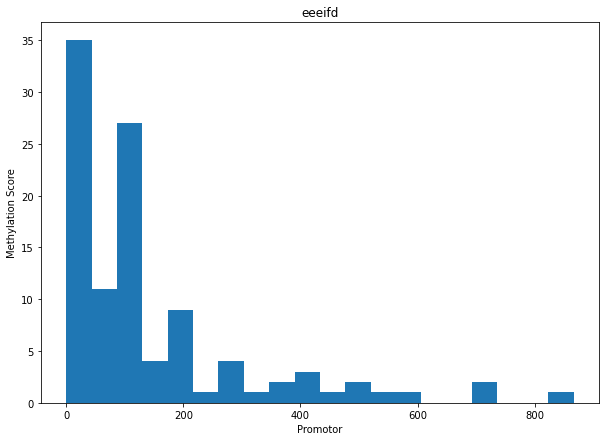

In [81]:
#create histograms

from matplotlib import pyplot as plt
import numpy as np
 
#stage 4
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(whole2, bins = 20)
plt.xlabel('Promotor')
plt.ylabel('Methylation Score')
plt.title("Stage 4 Promotor Methylation Score")
 
# Show plot
plt.show()


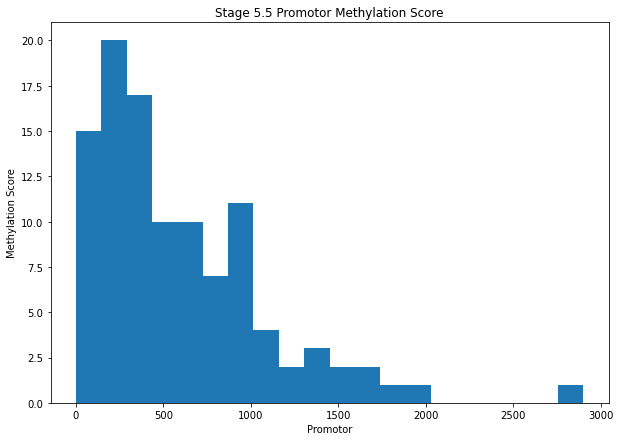

In [82]:
#stage 4
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(epi2, bins = 20)
plt.xlabel('Promotor')
plt.ylabel('Methylation Score')
plt.title("Stage 5.5 Promotor Methylation Score")
 
# Show plot
plt.show()

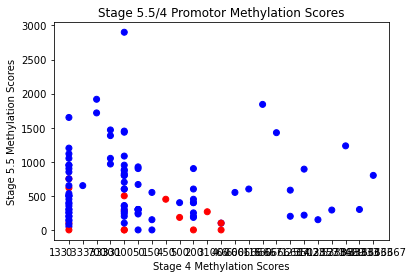

In [105]:
#make 2 lists, with methylation scores only in those promoters with scores at both stages
#change hox genes to a different color
num = 0
epi3 = []
whole3 = []
colors = []
for i in range(106):
    if epi.iloc[i,6] == ".":
        continue
    if whole.iloc[i,6] == ".":
        continue
    epi3.append(epi.iloc[i,6])
    whole3.append(whole.iloc[i,6])
    if "Hox" in whole.iloc[i,3]:
        colors.append("Red")
    else:
        colors.append("Blue")

plt.scatter(whole3, epi3, c=colors)
plt.xlabel('Stage 4 Methylation Scores')
plt.ylabel('Stage 5.5 Methylation Scores')
plt.title("Stage 5.5/4 Promotor Methylation Scores")
plt.show()

In [123]:
#t tests

#construct methylation scores for hox and non-hox genes separately
whole_hox = []
whole_nohox = []
epi_hox = []
epi_nohox = []
for i in range(106):
    if epi.iloc[i,6] == ".":
        continue
    if whole.iloc[i,6] == ".":
        continue
    if "Hox" in whole.iloc[i,3]:
        epi_hox.append(epi.iloc[i,6])
        whole_hox.append(float(whole.iloc[i,6]))
    else:
        epi_nohox.append(epi.iloc[i,6])
        whole_nohox.append(float(whole.iloc[i,6]))
        

In [126]:
#t tests continued

#Stage 5.5
import scipy as sc 
from scipy import stats
sc.stats.ttest_ind(epi_hox,epi_nohox) 

#result reveals that Hox gene promoters are significantly less methylated than other gene promoters at stage E5.5

Ttest_indResult(statistic=-2.9478038625399785, pvalue=0.003959553022399641)

In [125]:
#stage 4
sc.stats.ttest_ind(whole_hox,whole_nohox) 

#result reveals no stiatiscally significant difference between hox and non-hox gene promotor methylation scores 

Ttest_indResult(statistic=1.2491768481358854, pvalue=0.21443182015103496)